In [3]:
# Pablo Exposito Matilla al415550@uji.es

## 3. Bayesian networks

***` Monty Hall`***

First, consider this situation, and how we can model it as a Bayesian network. Then, follow the notebook MontyHall- Problem.ipynb to understand how the model is implemented in pomegranate and how different inferences can be made. Explore the problem using the model in pomegranate:

In [2]:
!pip install pomegranate==0.13.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pomegranate: filename=pomegranate-0.13.0-cp310-cp310-linux_x86_64.whl size=14265858 sha256=a22f32ee57f7cb1d8e22faee914380b000bb04254dfff20c328a216f8ae1ef14
  Stored in directory: /root/.cache/pip/wheels/73/c1/c2/506ecde883bdab789bd89ee279a66f4d03d4730e5f2832656c
Successfully built pomegranate


In [4]:
!apt install libgraphviz-dev
!pip uninstall pygraphviz -y
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk libxdot4
0 upgraded, 8 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,148 kB of archives.
After this operation, 7,427 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-common all 2.24.32-4ubuntu4 [126 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libgtk2.0-0 amd64 2.24.32-4ubuntu4 [1,791 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail18 amd64 2.24.32-4ubuntu4 [14.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 libgail-common amd64 2.24.32-4ub

In [5]:
from pomegranate import *
import matplotlib.pyplot as plt
import seaborn
import numpy
import pygraphviz

seaborn.set_style('whitegrid')
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

In [6]:
guest = DiscreteDistribution({'A':1/3,'B':1/3,'C':1/3})
print("guest",guest)
print("parameters:",guest.parameters)
print("P(G=A)=",guest.parameters[0]["A"])

guest {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "B" :0.3333333333333333,
            "C" :0.3333333333333333
        }
    ],
    "frozen" :false
}
parameters: [{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.3333333333333333}]
P(G=A)= 0.3333333333333333


In [7]:
prize = DiscreteDistribution({'A':1/3,'B':1/3,'C':1/3})
print(prize)

{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "A" :0.3333333333333333,
            "B" :0.3333333333333333,
            "C" :0.3333333333333333
        }
    ],
    "frozen" :false
}


In [8]:
monty = ConditionalProbabilityTable(
    # G    P   M  P(M|G,P)
    [['A','A','A',0.0],
     ['A','A','B',0.5],
     ['A','A','C',0.5],
     # sum = 1
     ['A','B','A',0.0],
     ['A','B','B',0.0],
     ['A','B','C',1.0],
     # sum = 1
     ['A','C','A',0.0],
     ['A','C','B',1.0],
     ['A','C','C',0.0],
     # sum = 1
     ['B','A','A',0.0],
     ['B','A','B',0.0],
     ['B','A','C',1.0],
     # sum = 1
     ['B','B','A',0.5],
     ['B','B','B',0.0],
     ['B','B','C',0.5],
     # sum = 1
     ['B','C','A',1.0],
     ['B','C','B',0.0],
     ['B','C','C',0.0],
     # sum = 1
     ['C','A','A',0.0],
     ['C','A','B',1.0],
     ['C','A','C',0.0],
     # sum = 1
     ['C','B','A',1.0],
     ['C','B','B',0.0],
     ['C','B','C',0.0],
     # sum = 1
     ['C','C','A',0.5],
     ['C','C','B',0.5],
     ['C','C','C',0.0]
     # sum = 1
     ], 
     [guest,prize])
print(monty)

A	A	A	0.0
A	A	B	0.5
A	A	C	0.5
A	B	A	0.0
A	B	B	0.0
A	B	C	1.0
A	C	A	0.0
A	C	B	1.0
A	C	C	0.0
B	A	A	0.0
B	A	B	0.0
B	A	C	1.0
B	B	A	0.5
B	B	B	0.0
B	B	C	0.5
B	C	A	1.0
B	C	B	0.0
B	C	C	0.0
C	A	A	0.0
C	A	B	1.0
C	A	C	0.0
C	B	A	1.0
C	B	B	0.0
C	B	C	0.0
C	C	A	0.5
C	C	B	0.5
C	C	C	0.0


In [9]:
# State objects hold both the distribution, and a high level name
s_g = State(guest,name='guest')
s_p = State(prize,name='prize')
s_m = State(monty,name='monty')

In [10]:
# Bayesian network
model = BayesianNetwork("Monty Hall Problem")
print(model.name)

Monty Hall Problem


In [11]:
model.add_states(s_g,s_p,s_m) # order is unimportant now, but *should* be considered later
print(model) # we can explore and check the output

Monty Hall Problem:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.3333333333333333,
                "B" : 0.3333333333333333,
                "C" : 0.3333333333333333
            }
        ],
        "frozen" : false
    },
    "name" : "guest",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "A" : 0.3333333333333333,
                "B" : 0.3333333333333333,
                "C" : 0.3333333333333333
            }
        ],
        "frozen" : false
    },
    "name" : "prize",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
         

In [12]:
# add_edge(parent,child) parent -> child
model.add_edge(s_g,s_m) 
model.add_edge(s_p,s_m)

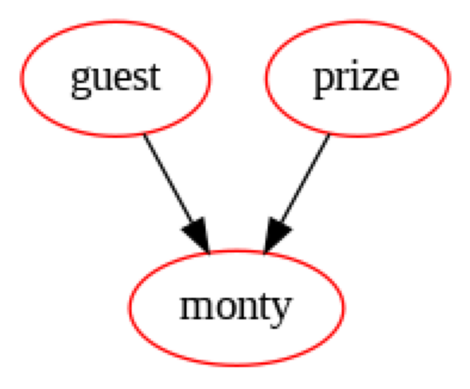

In [13]:
# draw network (graph)

model.plot()

#print(model)

In [14]:
# Prepare for internal computations (factor graphs in BN)
model.bake()

In [15]:
# probability that you initially said door A, that Monty then opened door B, but that the actual car was behind door C
# P(Guest=A,Monty=B,Prize=C) = P(Guest=A)*P(Prize=B)*P(Monty=B|Guest=A,Prize=C) = 1/3 * 1/3 * 1 = 1/9 = 0.111111
model.probability([['A','C','B']]) # IMPORTANT: in the order in which states were added to the model via add_states

0.11111111111111109

In [16]:
# probability of initially saying door A, that Monty opened door B, and that the car was actually behind door B
# Impossible situation because Monty will not open the door with the prize :)
model.probability([['A','B','B']])

0.0

In [17]:
p = model.predict_proba({})
# marginal distribution for each variable, in the same order they were put into the model. 
# In this case, they represent the guest, prize, and monty variables, respectively. 
# We see that everything is equally likely before knowing anything about chosen doors.
print(p)

[{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.33333333333333337,
             "B" :0.33333333333333337,
             "C" :0.33333333333333337
         }
     ],
     "frozen" :false
 }
 {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "A" :0.33333333333333337,
             "B" :0.33333333333333337,
             "C" :0.33333333333333337
         }
     ],
     "frozen" :false
 }
 {
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "C" :0.3333333333333333,
             "A" :0.3333333333333333,
             "B" :0.3333333333333333
         }
     ],
     "frozen" :false
 }                                   ]


In [18]:
# None or np.nan represents an unobserved variable
# The same as above
p = model.predict_proba([[None, None, None]])
G,P,M=0,1,2
print(p[0][G].parameters)
print(p[0][P].parameters)
print(p[0][M].parameters)

# The same with a loop
for variable in ['G','P','M']:
  print("P("+variable+") = ",p[0][eval(variable)].parameters)

[{'A': 0.33333333333333337, 'B': 0.33333333333333337, 'C': 0.33333333333333337}]
[{'A': 0.33333333333333337, 'B': 0.33333333333333337, 'C': 0.33333333333333337}]
[{'C': 0.3333333333333333, 'A': 0.3333333333333333, 'B': 0.3333333333333333}]
P(G) =  [{'A': 0.33333333333333337, 'B': 0.33333333333333337, 'C': 0.33333333333333337}]
P(P) =  [{'A': 0.33333333333333337, 'B': 0.33333333333333337, 'C': 0.33333333333333337}]
P(M) =  [{'C': 0.3333333333333333, 'A': 0.3333333333333333, 'B': 0.3333333333333333}]


<ipython-input-18-746be6607bf2>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model.predict_proba([[None, None, None]])


In [19]:
# Now with some evidences

# If guest chooses door A
X = [['A', None, None]]
p = model.predict_proba(X) #  matrix of posterior probabilities P(M|D)
#print(p)
print("Guest choice:",p[0][0]) # This has fixed value for the variable "guest" since we assign the value; so, no parameters
print("Prize probabilities:",p[0][1].parameters) # Where the prize is? Note this is unaffected by door chosen
print("Monty probabilities:",p[0][2].parameters) # Which door will the presenter open? Since guest chose one door, only the two other doors are (equally) possible

print(model.predict(X)) # arg max over the matrix that model.predict_proba(X) computes. Note that there are other choices with the same max probability (!)

Guest choice: A
Prize probabilities: [{'A': 0.3333333333333333, 'B': 0.3333333333333333, 'C': 0.3333333333333333}]
Monty probabilities: [{'C': 0.49999999999999983, 'A': 0.0, 'B': 0.49999999999999983}]
[array(['A', 'A', 'C'], dtype=object)]


<ipython-input-19-85d396cd1419>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model.predict_proba(X) #  matrix of posterior probabilities P(M|D)
<ipython-input-19-85d396cd1419>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(model.predict(X)) # arg max over the matrix that model.predict_proba(X) computes. Note that there ar

In [20]:
# If guest chooses door A and Monty opens door B
p=model.predict_proba({'guest':'A','monty':'B'}) # now we use an alternative notation with a dictionary rather than a list
print(p)
print("P(Prize|Guest=A,Monty=B)=", p[1].parameters) # notice the double chance the other door has the prize

['A' {
         "class" :"Distribution",
         "dtype" :"str",
         "name" :"DiscreteDistribution",
         "parameters" :[
             {
                 "A" :0.3333333333333334,
                 "B" :0.0,
                 "C" :0.6666666666666664
             }
         ],
         "frozen" :false
     }                                    'B']
P(Prize|Guest=A,Monty=B)= [{'A': 0.3333333333333334, 'B': 0.0, 'C': 0.6666666666666664}]


MH1. Where in the code can you visually check that ∑ P(M|G=g0,P= p0)=1,
M∈{A,B}
for any fixed values g0 and p0?

In [21]:
"""
Podemos observar que todas las probabilidades introducidas
la suma debe de ser obligatoriamente 1. 

monty = ConditionalProbabilityTable(
    # G    P   M  P(M|G,P)
    [['A','A','A',0.0],
     ['A','A','B',0.5],
     ['A','A','C',0.5],
     # sum = 1.             <--
     ['A','B','A',0.0],
     ['A','B','B',0.0],
     ['A','B','C',1.0],
     # sum = 1              <--
     ['A','C','A',0.0],
     ['A','C','B',1.0],
     ['A','C','C',0.0],
     # sum = 1              <--
     ['B','A','A',0.0],
     ['B','A','B',0.0],
     ['B','A','C',1.0],
     # sum = 1             <-- ...
     ['B','B','A',0.5],
     ['B','B','B',0.0],
     ['B','B','C',0.5],
     # sum = 1
     ['B','C','A',1.0],
     ['B','C','B',0.0],
     ['B','C','C',0.0],
     # sum = 1
     ['C','A','A',0.0],
     ['C','A','B',1.0],
     ['C','A','C',0.0],
     # sum = 1
     ['C','B','A',1.0],
     ['C','B','B',0.0],
     ['C','B','C',0.0],
     # sum = 1
     ['C','C','A',0.5],
     ['C','C','B',0.5],
     ['C','C','C',0.0]
     # sum = 1
     ], 
     [guest,prize])
"""

"\nPodemos observar que todas las probabilidades introducidas\nla suma debe de ser obligatoriamente 1. \n\nmonty = ConditionalProbabilityTable(\n    # G    P   M  P(M|G,P)\n    [['A','A','A',0.0],\n     ['A','A','B',0.5],\n     ['A','A','C',0.5],\n     # sum = 1.             <--\n     ['A','B','A',0.0],\n     ['A','B','B',0.0],\n     ['A','B','C',1.0],\n     # sum = 1              <--\n     ['A','C','A',0.0],\n     ['A','C','B',1.0],\n     ['A','C','C',0.0],\n     # sum = 1              <--\n     ['B','A','A',0.0],\n     ['B','A','B',0.0],\n     ['B','A','C',1.0],\n     # sum = 1             <-- ...\n     ['B','B','A',0.5],\n     ['B','B','B',0.0],\n     ['B','B','C',0.5],\n     # sum = 1\n     ['B','C','A',1.0],\n     ['B','C','B',0.0],\n     ['B','C','C',0.0],\n     # sum = 1\n     ['C','A','A',0.0],\n     ['C','A','B',1.0],\n     ['C','A','C',0.0],\n     # sum = 1\n     ['C','B','A',1.0],\n     ['C','B','B',0.0],\n     ['C','B','C',0.0],\n     # sum = 1\n     ['C','C','A',0.5],\n   

MH2. Find out some probabilities such as P(G,M = A,P), and P(G|M = A,P = B).

In [22]:
# Now with some evidences

# If MONTY chooses door A
X = [[ None, None, 'A']]
p = model.predict_proba(X) 
print(p)

[array([{
           "class" :"Distribution",
           "dtype" :"str",
           "name" :"DiscreteDistribution",
           "parameters" :[
               {
                   "A" :0.0,
                   "B" :0.49999999999999983,
                   "C" :0.49999999999999983
               }
           ],
           "frozen" :false
       }                                    ,
       {
           "class" :"Distribution",
           "dtype" :"str",
           "name" :"DiscreteDistribution",
           "parameters" :[
               {
                   "A" :0.0,
                   "B" :0.49999999999999983,
                   "C" :0.49999999999999983
               }
           ],
           "frozen" :false
       }                                    , 'A'], dtype=object)]


<ipython-input-22-8dd975648978>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = model.predict_proba(X)


In [23]:
# If MONTY chooses door A and PRICE in door B
p=model.predict_proba({'price':'B','monty':'A'}) # now we use an alternative notation with a dictionary rather than a list
print("P(Guest|Price=B,Monty=A)=", p[1].parameters) # notice the double chance the other door has the prize

P(Guest|Price=B,Monty=A)= [{'A': 0.0, 'B': 0.49999999999999983, 'C': 0.49999999999999983}]


MH3. Show that guests are more likely to win if they change their mind after Monty opens a door.

In [24]:
# If guest chooses door A and Monty opens door B
p=model.predict_proba({'guest':'A','monty':'B'}) # now we use an alternative notation with a dictionary rather than a list
print(p)
print("P(Prize|Guest=A,Monty=B)=", p[1].parameters) # notice the double chance the other door has the prize

"""
 Si cambian de opinión después de que Monty abre una puerta, tiene el doble de probabilidad
 de ganar el premio, como podemos demostrar con este ejemplo.
"""

['A' {
         "class" :"Distribution",
         "dtype" :"str",
         "name" :"DiscreteDistribution",
         "parameters" :[
             {
                 "A" :0.3333333333333334,
                 "B" :0.0,
                 "C" :0.6666666666666664
             }
         ],
         "frozen" :false
     }                                    'B']
P(Prize|Guest=A,Monty=B)= [{'A': 0.3333333333333334, 'B': 0.0, 'C': 0.6666666666666664}]


'\n Si cambian de opinión después de que Monty abre una puerta, tiene el doble de probabilidad\n de ganar el premio, como podemos demostrar con este ejemplo de la red bayesiana.\n'